First, let's try to just simulate a pendulum.
A simple pendulum of mass $m$ on a string of length $l$ with a gravitational acceleration of $g$ and drag coefficient $b$ has an angle from vertical given by:
$$ m l^2 \ddot{\theta} = -mg \sin( \theta ) - b \dot{\theta}, $$
or, equivalently
$$ \ddot{\theta} + 2 \zeta \omega_0 \dot{\theta} + \omega_0^2 \sin(\theta) = 0. $$

In [1]:
using ModelingToolkit

In [5]:
# Set up the ODE
@variables t θ(t)
@parameters ζ ω_0
Dt = Differential(t)
DDt = Dt^2

@named simple_pendulum = ODESystem(DDt(θ) ~ -2ζ*ω_0*Dt(θ) - ω_0^2*sin(θ) , t )

Model simple_pendulum with 1 equations
States (1):
  θ(t)
Parameters (2):
  ζ
  ω_0

In [3]:
using DifferentialEquations

In [6]:
pendulum_simplified = structural_simplify(simple_pendulum)

Model simple_pendulum with 2 equations
States (2):
  θˍt(t)
  θ(t)
Parameters (2):
  ζ
  ω_0
Incidence matrix:sparse([1, 2, 1, 2, 1], [1, 2, 3, 3, 4], Num[×, ×, ×, ×, ×], 2, 4)

In [57]:
prob = ODEProblem(pendulum_simplified, [θ => π, Dt(θ) => -10.0], (0.0, 10.0), [ζ => 0.1, ω_0 => 2])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 -10.0
   3.141592653589793

In [58]:
using Plots

In [59]:
sol = solve(prob);

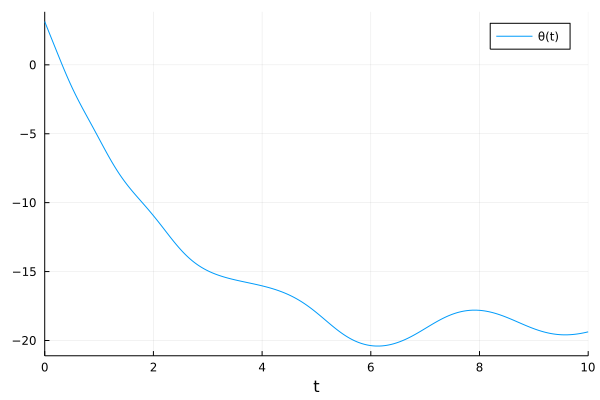

In [60]:
plot(sol,vars=θ)

In [61]:
using Printf

┌ Info: Saved animation to 
│   fn = /tmp/jl_jfnwtR.gif
└ @ Plots /home/nklugman/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/tmp/jl_jfnwtR.gif")
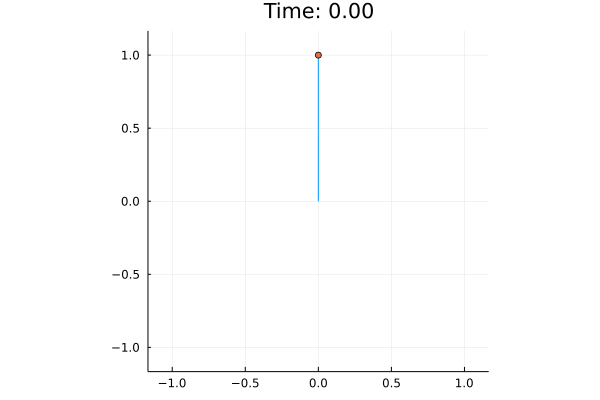

In [63]:
# Make an animation

anim = @animate for t ∈ sol.t
    _,angle = sol(t)
    x,y = sin(angle), -cos(angle)
    xs, ys = range(0,x,100), range(0,y,100)
    plot(xs,ys, xlims=[-1.1, 1.1], ylims=[-1.1,1.1], aspect_ratio=:equal)
    title = @sprintf("Time: %.2f", t)
    scatter!([x],[y], title=title, legend=false)
end 
gif(anim, fps=10)